A ternary search tree has nodes with the following attributes:
* a character, can be `None`;
* a Boolean flag that indicates whether the character represented
  by this node has been the last in a string that was inserted in the
  tree;
* the "less-than" child;
* the "equals" child and
* the "larger-than" child.

The data structure should support the following operations:
* string insert
* string search
* prefix string search
* return the number of strings stored in the data structure
* return all strings stored in the data structure

Also ensure that an instance of the data structure can be visualy represented, e.g., in aSCII format.

# Implementation

In [1]:
%load_ext autoreload
%autoreload 2

The data structure has been implemented as a class.

In [2]:
from ternary_search_tree import TernarySearchTree

# Example usage

Create a new empty ternery search tree.

In [3]:
tst = TernarySearchTree()

Insert the string `'abc'` into the tree.

In [4]:
tst.insert('abc')

Display the tree.

In [5]:
print(tst)

terminates: False
  char: a, terminates: False
  _eq:     char: b, terminates: False
    _eq:       char: c, terminates: True


Insert another string `'aqt'`.

In [6]:
tst.insert('aqt')

In [7]:
print(tst)

terminates: False
  char: a, terminates: False
  _eq:     char: b, terminates: False
    _eq:       char: c, terminates: True
    _gt:       char: q, terminates: False
      _eq:         char: t, terminates: True


The tree should now contain two strings.

In [8]:
len(tst)

2

In [9]:
tst.all_strings()

['abc', 'aqt']

Search for the string `'ab'`, it should be found since it is a prefix of `'abc'`.

In [10]:
tst.search('ab')

True

The string `'ac'` should not be found.

In [11]:
tst.search('ac')

False

The tree can also contain the empty string.

In [12]:
tst.insert('')

In [13]:
len(tst)

3

In [14]:
print(tst)

terminates: True
  char: a, terminates: False
  _eq:     char: b, terminates: False
    _eq:       char: c, terminates: True
    _gt:       char: q, terminates: False
      _eq:         char: t, terminates: True


In [15]:
tst.all_strings()

['', 'abc', 'aqt']

# Testing

The file `data/search_trees/insert_words.txt` contains words that we can insert into a tree.

In [16]:
tst = TernarySearchTree()
with open('data/search_trees/insert_words.txt') as file:
    words = [
        line.strip() for line in file
    ]
for word in words:
    tst.insert(word)
unique_words = set(words)

Verify the length of the data stucture.

In [17]:
assert len(tst) == len(unique_words), \
       f'{len(tst)} in tree, expected {len(unique_words)}'

Verify that all words that were inserted can be found.

In [18]:
for word in unique_words:
    assert tst.search(word), f'{word} not found'

Verify that all prefixes can be found.

In [19]:
for word in unique_words:
    for i in range(len(word) - 1, 0, -1):
        prefix = word[:i]
        assert tst.search(prefix), f'{prefix} not found'

Chack that when searching for a exact match, only the inserted words are found, and no prefixes.

In [20]:
for word in unique_words:
    for i in range(len(word), 0, -1):
        prefix = word[:i]
        if prefix not in unique_words:
            assert not tst.search(prefix, exact=True), \
                   f'{prefix} found'

Check that the empty string is in the tree (since it is a prefix of any string).

In [21]:
assert tst.search(''), 'empty string not found'

Check that the empty string is not in the tree for an exact search.

In [22]:
assert not tst.search('', exact=True), 'empty string found'

Check that words in the file `data/search_trees/not_insert_words.txt` can not be found in the tree.

In [23]:
with open('data/search_trees/not_insert_words.txt') as file:
    for line in file:
        word = line.strip()
        assert not tst.search(word), f'{word} should not be found'

Check that all strings are returned.

In [24]:
all_strings = tst.all_strings()
assert len(all_strings) == len(unique_words), \
       f'{len(all_strings)} words, expected {len(unique_words)}'
assert sorted(all_strings) == sorted(unique_words), 'words do not match'

If not output was generated, all tests have passed.

# Performance

To assess the performance, i.e., the time it takes to insert a new string or search the binary tree as a function of the tree's size, we need a large dataset.  This is provided in `data/search_trees/corncob_lowercase.txt`.  This file contains over 58,000 English words, all lower case.

In [25]:
with open('data/search_trees/corncob_lowercase.txt') as file:
    words = [line.strip() for line in file]

In [26]:
len(words)

58110

The words are alphabetically ordered.

In [27]:
words[:20]

['aardvark',
 'aardwolf',
 'aaron',
 'aback',
 'abacus',
 'abaft',
 'abalone',
 'abandon',
 'abandoned',
 'abandonment',
 'abandons',
 'abase',
 'abased',
 'abasement',
 'abash',
 'abashed',
 'abate',
 'abated',
 'abatement',
 'abates']

We will select random samples of increasing sizes from the list.

In [2]:
import random
import time
import matplotlib.pyplot as plt

In [29]:
sizes = [100, 500, 1_000, 5_000, 10_000, 20_000, 30_000, 40_000, 50_000]

In [30]:
samples = [
    random.sample(words, k=size) for size in sizes
]

We can now time how long it takes to insert words into a ternary-search-tree of various sizes.  First we build the ternary-search-tree based on the sample, and then we insert words.

In [31]:
# Time to insert 20 non-existing words in trees of different sizes
nr_runs = 20
times = {}
for sample in samples:
    tst = TernarySearchTree()
    insert_sample = random.sample([w for w in words if w not in sample], k=20)
    for word in sample:
        tst.insert(word)
    times[len(sample)] = 0.0
    for _ in range(nr_runs):
        start_time = time.time_ns()
        for word in insert_sample:
            tst.insert(word)
        end_time = time.time_ns()
        times[len(sample)] += end_time - start_time
    times[len(sample)] /= nr_runs*1_000_000.0
times

{100: 0.02166,
 500: 0.0,
 1000: 0.050615,
 5000: 0.0,
 10000: 0.049975,
 20000: 0.0,
 30000: 0.05655,
 40000: 0.050035,
 50000: 0.05002}

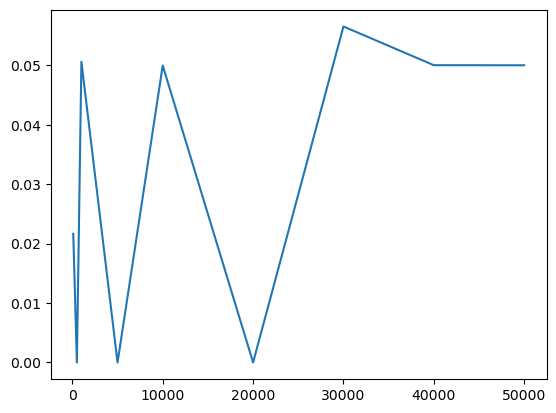

In [ ]:
plt.plot(times.keys(), times.values())

We can do the same for searching words in a B-tree of various sizes.  First we build the B-tree based on the sample, and then we search words.

In [33]:
#Times of searching 10 existing and 10 non existing words in trees of different sizes
nr_runs = 20
times = {}
for sample in samples:
    tst = TernarySearchTree()
    existing = random.sample(sample, k=10)
    non_existing = random.sample([w for w in words if w not in sample], k=10)
    search_sample = existing + non_existing
    for word in sample:
        tst.insert(word)
    times[len(sample)] = 0.0
    for _ in range(nr_runs):
        start_time = time.time_ns()
        for word in search_sample:
            tst.search(word)
        end_time = time.time_ns()
        times[len(sample)] += end_time - start_time
    times[len(sample)] /= nr_runs*1_000_000.0
times

{100: 0.049945,
 500: 0.0,
 1000: 0.0,
 5000: 0.0,
 10000: 0.10015,
 20000: 0.02834,
 30000: 0.08714,
 40000: 0.0,
 50000: 0.04995}

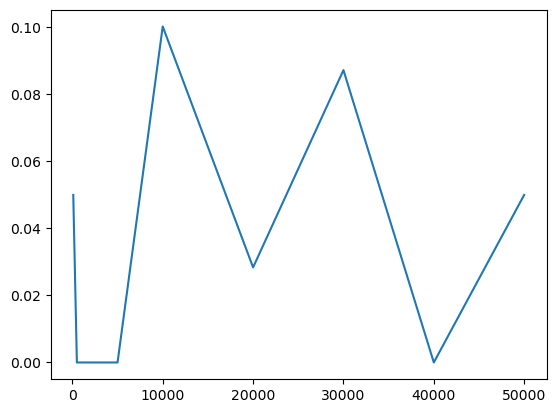

In [ ]:
plt.plot(times.keys(), times.values())

Results for the locally run benchmark ar a bit erratic, maybe because all times are very short and therefore give a random pattern, whereas we'd expect a logarithmic curve (see details below).
We also tested the implementation with a large data sample on the HPC infrastructure. We tested the same search and insert operations as tested above. 

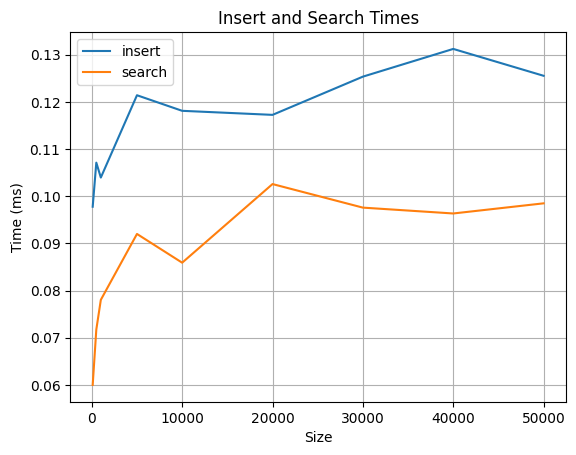

In [3]:
# Read and parse the timings.txt file with results from HPC benchmark
times = {}

with open("timings.txt", "r") as f:
    current_section = None
    for line in f:
        line = line.strip()
        if line.startswith("- tst.insert()"):
            current_section = "insert"
            times[current_section] = {}
        elif line.startswith("- tst.search()"):
            current_section = "search"
            times[current_section] = {}
        elif line.startswith("size="):
            size, time = line.split(":")
            size = int(size.split("=")[1])
            time = float(time.strip().split()[0])
            times[current_section][size] = time

# Plot insert and search timings

for section in times:
    plt.plot(times[section].keys(), times[section].values(), label=section)

plt.xlabel("Size")
plt.ylabel("Time (ms)")
plt.title("Insert and Search Times")
plt.legend()
plt.grid(True)
plt.show()


The graph with insert and search times shows that both have the shape of a logarithmic curve, as expected with the complexity in the average case of insert and search being O(log n). Since the ternary search trees were built with random samples, the trees are fairly random and balanced and the height of the trees is on average logarithmic. We follow a path of character comparisons through log-sized left/right trees for each character and most words are short, so the dominant cost grows logarithmically with the number of entries. Our benchmark is timing how long it takes to insert/search a constant and relatively low (20) number of words into trees of growing size. Therefore, we are measuring per-operation cost at a larger scale and as the number of words increases, the average depth (and so the time to reach a match or failure) grows logarithmically.
In the worst case scenario, the input words would not be randomly ordered and create an unbalanced ternary search tree. In that case, the complexity could degrade to O(n). In the best case scenario, the first character of the word we're inserting or searching for matches the root node and the rest of the word also follows a linear path without needing any left or right traversals. In that case, the time complexity is O(1).